In [9]:
# IMPORT NEEDED PACKAGES
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np

In [10]:
# READ FILE AND DROP ID, REPLACE ? WITH -99999
df = pd.read_csv("breast-cancer-wisconsin.data.txt")
df.drop(['id'],1, inplace = True)
df.replace('?', -99999, inplace=True)

df.head() # Display 5 first rows of the Dataset

,clump_thickness,uni_cell_size,uni_cell_shape,marg_adhesion,epithelial_size,bare_nuclei,bland_chromatin,Normal_Nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [11]:
# ASSIGN CLASSES AND LABELS THEN SPLIT THE DATA BETWEEN TESTING AND TRAINING DATA

X = np.array(df.drop('class',1)) #Select all except 'Class' column as features
y = np.array(df['class']) #Select 'Class' Column as Labels/Targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

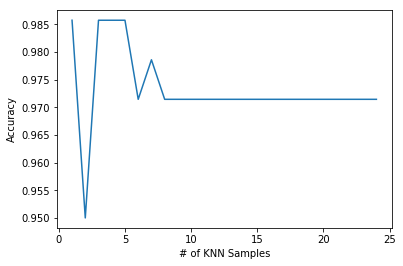

In [12]:
# knn = KNeighborsClassifier(n_neighbors = 11)

# Determine the best K to use
import matplotlib.pyplot as plt
%matplotlib inline

scores = []
myrange = range(1,25)

for k in myrange:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,pred))
    
# print(scores)

plt.plot(myrange, scores)
plt.xlabel("# of KNN Samples")
plt.ylabel("Accuracy")
plt.show()
    


In [13]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test,y_test)
print(accuracy)

0.971428571429


In [14]:
# Create Example Data for predictions
example_data = np.array([
    [3,1,1,6,7,5,4,3,1],
    [6,1,7,6,7,5,4,3,2],
    [3,1,1,6,7,5,4,3,1],
    [4,4,4,6,2,5,4,3,2], 
])

example_data = example_data.reshape(len(example_data),-1)
predictions = knn.predict(example_data)
# print(predictions)

for prediction in predictions:
    if(prediction == 2):
        print(prediction, '- Benign')
    else:
        print(prediction, '- Malignant')

2 - Benign
4 - Malignant
2 - Benign
2 - Benign
